
# Data Collection for National Flags and Anthems
- **Assignment Context:**  
- This notebook is part of the DA323 assignment-cum-project (Jan-May 2025, IIT Guwahati) on scalable data collection, multimodal analysis, and computational matching techniques.




# **Task A – Data Collection:**  
- 1. **National Flags:** We have downloaded PNG files of national flags (using the command `npm install --save svg-country-flags`). The files are stored locally, with file names corresponding to the two-letter country codes (e.g., `US.png`, `IN.png`).
- 2. **Anthem Translations:** We will obtain English translations of national anthems from [nationalanthems.info](https://nationalanthems.info/).
- 3. **Anthem Audio (mp3):** For a subset of nations, we will also download the mp3 files of the national anthems from the same website.
### In the following sections, we outline and implement each part.


## A.1. National Flags
- We assume that the flag images are downloaded and stored in a local folder (e.g., `flags_png/`).
- Each file is named using the two-letter country code (e.g., `US.png`, `GB.png`).
####In this section, we list the available flag files and display a sample image.


In [5]:
# %% [code]
import os
from IPython.display import Image, display

# Define the directory where flag PNGs are stored.
flags_dir = "flags_png"  # Update the path if necessary

# List all PNG files in the directory.
try:
    flag_files = [f for f in os.listdir(flags_dir) if f.endswith('.png')]
    print("Total flag images found:", len(flag_files))
    print("Sample flag files:", flag_files[:10])
except Exception as e:
    print("Error accessing flags directory:", e)


Total flag images found: 256
Sample flag files: ['ad.png', 'ae.png', 'af.png', 'ag.png', 'ai.png', 'al.png', 'am.png', 'an.png', 'ao.png', 'aq.png']



### Let's display one sample flag. (For example, the first one in the list.)


Displaying sample flag: ad.png


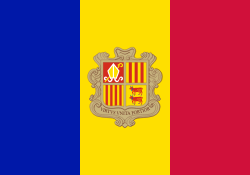

In [6]:

if flag_files:
    sample_flag = os.path.join(flags_dir, flag_files[0])
    print("Displaying sample flag:", flag_files[0])
    display(Image(filename=sample_flag))
else:
    print("No flag files found.")


 ## A.2. National Anthem Translations
-  We now obtain the English translations of national anthems from [nationalanthems.info](https://nationalanthems.info/).
- **Note:** The website structure may vary, so the following code is a template that:
    - Constructs a URL based on the two-letter country code.
    - Uses `requests` to fetch the webpage.
    - Parses the HTML using `BeautifulSoup` to extract the anthem translation.
    
In this example, we assume that the translation is contained in an HTML element with a specific attribute (e.g., `<div id="translation">`).
You may need to adjust the HTML selectors according to the actual page structure.


In [15]:
import requests
from bs4 import BeautifulSoup

def fetch_anthem_translation(country_code):
    """
    Fetch the English translation of the national anthem for a given country.
    The URL is constructed based on the country code.
    logic:
      - Finds all div elements with class "collapseomatic_content".
      - Since the English translation is always in the last block, returns the text of the last block.
    A custom User-Agent header is added to bypass potential 406 errors.
    """
    
    # Construct the URL.
    url = f"https://nationalanthems.info/{country_code.lower()}.htm"
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                      "AppleWebKit/537.36 (KHTML, like Gecko) "
                      "Chrome/115.0.0.0 Safari/537.36"
    }
    try:
        response = requests.get(url, headers=headers, timeout=10)
        if response.status_code == 200:
            soup = BeautifulSoup(response.content, "html.parser")
            # Find all translation blocks
            translation_divs = soup.find_all("div", class_="collapseomatic_content")
            if translation_divs:
                # The English translation is assumed to be in the last block.
                english_translation_div = translation_divs[-1]
                translation_text = english_translation_div.get_text(separator="\n").strip()
                return translation_text
            else:
                print(f"Translation blocks not found for {country_code}.")
                return None
        else:
            print(f"Failed to fetch page for {country_code}. Status code: {response.status_code}")
            return None
    except Exception as ex:
        print(f"Error fetching anthem for {country_code}: {ex}")
        return None

# Example: Fetch anthem translation for INDIA (country code "IN").
country_code = "IN"
anthem_translation = fetch_anthem_translation(country_code)
print(f"Anthem Translation for {country_code}:\n", anthem_translation)


Anthem Translation for IN:
 Thou art the ruler of the minds of all people,

Dispenser of India’s destiny.

Thy name rouses the hearts of Punjab, Sind,

Gujarat and Maratha,

Of the Dravida and Orissa and Bengal;

It echoes in the hills of the Vindhyas and Himalayas,

mingles in the music of Jamuna and Ganges and is

chanted by the waves of the Indian Sea.

They pray for thy blessings and sing thy praise.

The saving of all people waits in thy hand,

Thou dispenser of India’s destiny.

Victory, victory, victory to thee.



### To collect translations for all countries for which we have flag images, we loop over the list of country codes derived from the flag filenames.

- **Note:** Depending on network and website response times, this loop might take some time.


In [16]:

import json

anthem_translations = {}
for flag_file in flag_files:
    country_code = flag_file.split('.')[0]  # Extract country code from filename
    print(f"Processing anthem for {country_code}...")
    translation = fetch_anthem_translation(country_code)
    if translation:
        anthem_translations[country_code] = translation

# Save the translations to a JSON file for future reference.
with open("anthem_translations.json", "w", encoding="utf-8") as f:
    json.dump(anthem_translations, f, indent=4, ensure_ascii=False)

print("Anthem translations collection completed. Data saved to anthem_translations.json")


Processing anthem for ad...
Processing anthem for ae...
Processing anthem for af...
Processing anthem for ag...
Processing anthem for ai...
Processing anthem for al...
Processing anthem for am...
Processing anthem for an...
Failed to fetch page for an. Status code: 404
Processing anthem for ao...
Processing anthem for aq...
Failed to fetch page for aq. Status code: 404
Processing anthem for ar...
Processing anthem for as...
Processing anthem for at...
Processing anthem for au...
Processing anthem for aw...
Processing anthem for ax...
Processing anthem for az...
Processing anthem for ba...
Translation blocks not found for ba.
Processing anthem for bb...
Processing anthem for bd...
Processing anthem for be...
Processing anthem for bf...
Processing anthem for bg...
Processing anthem for bh...
Processing anthem for bi...
Processing anthem for bj...
Processing anthem for bl...
Processing anthem for bm...
Processing anthem for bn...
Processing anthem for bo...
Processing anthem for bq...
Fai

Processing anthem for yt...
Translation blocks not found for yt.
Processing anthem for za...
Processing anthem for zm...
Processing anthem for zw...
Anthem translations collection completed. Data saved to anthem_translations.json


In [17]:
import json

# Load the saved anthem translations from the JSON file.
with open("anthem_translations.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# Count the number of keys in the dictionary, each representing a successful collection.
successful_count = len(data)
print("Total number of successful anthem translations collected:", successful_count)


Total number of successful anthem translations collected: 228


## A.3. National Anthem Music Compositions (mp3 files)
- For a subset of nations, we also download the mp3 files of the national anthems.
- Similar to the translations, we assume that the mp3 file is available at a URL that can be constructed using the country code.
- For this example, we assume the URL follows the pattern:

```
 https://nationalanthems.info/{country_code.lower()}.mp3
```

- The code below downloads the mp3 file and saves it locally in a directory (e.g., `anthem_mp3/`).


In [19]:

def download_anthem_mp3(country_code, save_dir="anthem_mp3"):
    """
    Download the national anthem mp3 for a given country code.
    """
    url = f"https://nationalanthems.info/{country_code.lower()}.mp3"
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                      "AppleWebKit/537.36 (KHTML, like Gecko) "
                      "Chrome/115.0.0.0 Safari/537.36"
    }
    try:
        response = requests.get(url, headers=headers,timeout=10)
        if response.status_code == 200:
            
            os.makedirs(save_dir, exist_ok=True)
            file_path = os.path.join(save_dir, f"{country_code.upper()}.mp3")
            with open(file_path, "wb") as f:
                f.write(response.content)
            print(f"Downloaded mp3 for {country_code}")
        else:
            print(f"Failed to download mp3 for {country_code}. Status code: {response.status_code}")
    except Exception as ex:
        print(f"Error downloading mp3 for {country_code}: {ex}")


download_anthem_mp3("US")


Downloaded mp3 for US



### Now, we select a subset of countries for which we want to download the mp3 files.
- **Note:** Ensure that these countries have mp3 files available on the website.


In [20]:

subset_countries = [
    "us", "gb", "ca", "au", "fr", "de", "it", "es", "jp", "cn",
    "in", "br", "ru", "kr", "nl", "ch", "se", "no", "dk", "fi",
    "be", "at", "nz", "sg", "mx", "ar", "sa", "ae", "il", "gr",
    "ie", "pt", "pl", "cz", "hu", "sk", "si", "bg", "ro", "tr",
    "eg", "ng", "pk", "th", "my", "id", "cl", "co", "pe", "vn"
]

print("Downloading anthem mp3 for the following 50 famous nations:")
print(subset_countries)

# Loop over the manually defined list and download the corresponding anthem mp3 files
for code in subset_countries:
    print(f"Attempting to download mp3 for {code.upper()}...")
    download_anthem_mp3(code)


['us', 'gb', 'ca', 'au', 'fr', 'de', 'it', 'es', 'jp', 'cn', 'in', 'br', 'ru', 'kr', 'nl', 'ch', 'se', 'no', 'dk', 'fi', 'be', 'at', 'nz', 'sg', 'mx', 'ar', 'sa', 'ae', 'il', 'gr', 'ie', 'pt', 'pl', 'cz', 'hu', 'sk', 'si', 'bg', 'ro', 'tr', 'eg', 'ng', 'pk', 'th', 'my', 'id', 'cl', 'co', 'pe', 'vn']
Attempting to download mp3 for US...
Downloaded mp3 for us
Attempting to download mp3 for GB...
Downloaded mp3 for gb
Attempting to download mp3 for CA...
Downloaded mp3 for ca
Attempting to download mp3 for AU...
Downloaded mp3 for au
Attempting to download mp3 for FR...
Downloaded mp3 for fr
Attempting to download mp3 for DE...
Downloaded mp3 for de
Attempting to download mp3 for IT...
Downloaded mp3 for it
Attempting to download mp3 for ES...
Downloaded mp3 for es
Attempting to download mp3 for JP...
Downloaded mp3 for jp
Attempting to download mp3 for CN...
Downloaded mp3 for cn
Attempting to download mp3 for IN...
Downloaded mp3 for in
Attempting to download mp3 for BR...
Downloaded mp


## Summary
- In this notebook, we have:
- **Collected National Flags:** Listed the PNG files stored locally with filenames based on two-letter country codes.
- **Scraped Anthem Translations:** Fetched English translations of national anthems from [nationalanthems.info](https://nationalanthems.info/) and saved them as a JSON file.
- **Downloaded Anthem mp3 Files:** Retrieved mp3 files for a subset of nations and stored them in a designated directory.

**These data collection steps form the foundation for further multimodal analysis tasks.**
